# TODO
* Change when `max_voltage` or `hyperpolarization_threshold` is not attained to the closest value

# Import libraries:

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Set up widgets for single-neuron simulation:

In [2]:
# decimal cases to account for python approximation errors:
round_w = widgets.IntSlider(
    value = 3,
    min = 0,
    max = 5,
    step = 1,
    description = 'value:',
    disabled = False,
    continuous_update = False,
    orientation = 'horizontal',
    readout = True,
    readout_format = 'd'
)

# time-related variables:
t_increment_w = widgets.FloatSlider(
    value = 0.01, # ms
    min = 0.01,
    max = 1,
    step = 0.01,
    description = 'ms:',
    disabled = False,
    continuous_update = False,
    orientation = 'horizontal',
    readout = True,
    readout_format = '.2f',
)

simul_duration_w = widgets.FloatSlider(
    value = 20, # ms
    min = 1,
    max = 100,
    step = 1,
    description = 'ms:',
    disabled = False,
    continuous_update = False,
    orientation = 'horizontal',
    readout = True,
    readout_format = '.1f',
)

# voltage-related variables:
rest_potential_w = widgets.FloatSlider(
    value = -65, # mV
    min = -100,
    max = 50,
    step = 2.5,
    description = 'mV:',
    disabled = False,
    continuous_update = False,
    orientation = 'horizontal',
    readout = True,
    readout_format ='.1f',
)

depol_threshold_w = widgets.FloatSlider(
    value = -55, # mV
    min = -100,
    max = 50,
    step = 2.5,
    description = 'mV:',
    disabled = False,
    continuous_update = False,
    orientation = 'horizontal',
    readout = True,
    readout_format ='.1f',
)

depol_potential_w = widgets.FloatSlider(
    value = +45, # mV
    min = -100,
    max = 50,
    step = 2.5,
    description = 'mV:',
    disabled = False,
    continuous_update = False,
    orientation = 'horizontal',
    readout = True,
    readout_format ='.1f',
)

hyperpol_potential_w = widgets.FloatSlider(
    value = -70, # mV
    min = -100,
    max = 50,
    step = 2.5,
    description = 'mV:',
    disabled = False,
    continuous_update = False,
    orientation = 'horizontal',
    readout = True,
    readout_format ='.1f',
)

# time constants:
rest_t_constant_w = widgets.FloatSlider(
    value = 0.2, # ms
    min = 0.01,
    max = 1,
    step = 0.01,
    description = 'ms:',
    disabled = False,
    continuous_update = False,
    orientation = 'horizontal',
    readout = True,
    readout_format ='.2f',
)

depol_t_constant_w = widgets.FloatSlider(
    value = 0.08, # ms
    min = 0.01,
    max = 1,
    step = 0.01,
    description = 'ms:',
    disabled = False,
    continuous_update = False,
    orientation = 'horizontal',
    readout = True,
    readout_format ='.2f',
)

repol_t_constant_w = widgets.FloatSlider(
    value = 0.12, # ms
    min = 0.01,
    max = 1,
    step = 0.01,
    description = 'ms:',
    disabled = False,
    continuous_update = False,
    orientation = 'horizontal',
    readout = True,
    readout_format ='.2f',
)

refract_t_constant_w = widgets.FloatSlider(
    value = 0.18, # ms
    min = 0.01,
    max = 1,
    step = 0.01,
    description = 'ms:',
    disabled = False,
    continuous_update = False,
    orientation = 'horizontal',
    readout = True,
    readout_format ='.2f',
)

In [3]:
print('Decimal cases:')
display(round_w)

print('\n ------------------------------------------------')
print('\n Time increment:')
display(t_increment_w)

print('Duration of the single-neuron simulation:')
display(simul_duration_w)

print('\n ------------------------------------------------')
print('\n Resting potential:')
display(rest_potential_w)

print('\n Depolarization threshold:')
display(depol_threshold_w)

print('\n Depolarization potential:')
display(depol_potential_w)

print('\n Hyperpolarization potential:')
display(hyperpol_potential_w)

print('\n ------------------------------------------------')
print('\n Resting period time constant:')
display(rest_t_constant_w)

print('\n Depolarization time constant:')
display(depol_t_constant_w)

print('\n Repolarization time constant:')
display(repol_t_constant_w)

print('\n Refractory period time constant:')
display(refract_t_constant_w)

Decimal cases:


IntSlider(value=3, continuous_update=False, description='value:', max=5)


 ------------------------------------------------

 Time increment:


FloatSlider(value=0.01, continuous_update=False, description='ms:', max=1.0, min=0.01, step=0.01)

Duration of the single-neuron simulation:


FloatSlider(value=20.0, continuous_update=False, description='ms:', min=1.0, readout_format='.1f', step=1.0)


 ------------------------------------------------

 Resting potential:


FloatSlider(value=-65.0, continuous_update=False, description='mV:', max=50.0, min=-100.0, readout_format='.1f…


 Depolarization threshold:


FloatSlider(value=-55.0, continuous_update=False, description='mV:', max=50.0, min=-100.0, readout_format='.1f…


 Depolarization potential:


FloatSlider(value=45.0, continuous_update=False, description='mV:', max=50.0, min=-100.0, readout_format='.1f'…


 Hyperpolarization potential:


FloatSlider(value=-70.0, continuous_update=False, description='mV:', max=50.0, min=-100.0, readout_format='.1f…


 ------------------------------------------------

 Resting period time constant:


FloatSlider(value=0.2, continuous_update=False, description='ms:', max=1.0, min=0.01, step=0.01)


 Depolarization time constant:


FloatSlider(value=0.08, continuous_update=False, description='ms:', max=1.0, min=0.01, step=0.01)


 Repolarization time constant:


FloatSlider(value=0.12, continuous_update=False, description='ms:', max=1.0, min=0.01, step=0.01)


 Refractory period time constant:


FloatSlider(value=0.18, continuous_update=False, description='ms:', max=1.0, min=0.01, step=0.01)

# Set up dependent variables:

In [4]:
# Period durations; these are determined by the time constants above:
depol_duration = np.round(6 * depol_t_constant_w.value, round_w.value) # 6 was randomly chosen for visualization purposes
repol_duration = np.round(6 * depol_t_constant_w.value, round_w.value)
refract_duration = np.round(6 * depol_t_constant_w.value, round_w.value)

# Define classes for single-neuron simulation:

In [5]:
class Time:
    def __init__(self, t_increment = t_increment_w.value): #ms
        self.t_current = np.round(0, round_w.value)
        self.t_increment = np.round(t_increment, round_w.value)

    def update_time(self):
        """
        Function to increment simulation time in miliseconds
        """
        self.t_current += np.round(self.t_increment, round_w.value)

In [6]:
class Neuron(Time):
    def __init__(self, state = 'rest', 
                 rest_potential = rest_potential_w.value,
                 depol_threshold = depol_threshold_w.value, 
                 depol_potential = depol_potential_w.value,
                 hyperpol_potential = hyperpol_potential_w.value):
        
        super().__init__()
        self.state = state
        
        #         self.channel_permeabilities = {'not_voltage_gated': # still not being used in the equations (Kandel et al.)
        #                                        {'sodium': 0.04,
        #                                         'potassium': 1,
        #                                         'chloride': 0.45,
        #                                         'calcium': 0
        #                                        },
        #                                        'voltage_gated': # still not being used in the equations (missing values and REF)
        #                                        {'sodium': {'density' :1,
        #                                                    'open_voltage': depol_threshold,
        #                                                    'close_voltage': max_voltage},
        #                                         'potassium': {'density' :1,
        #                                                       'open_voltage': max_voltage,
        #                                                       'close_voltage': hyperpol_potential}
        #                                        }
        #                                       }
        
        #         self.concentrations = {'extracellular': # still not being used in the equations; based on giant squid (Kandel et al.)
        #                                {'sodium': 440,
        #                                 'potassium': 20,
        #                                 'chloride': 560,
        #                                },
        #                                'intracellular': # still not being used in the equations; based on giant squid (Kandel et al.)
        #                                {'sodium': 50,
        #                                 'potassium': 400,
        #                                 'chloride': 52,
        #                                }
        #                               }
        
        self.conductances = {'rest':
                                  {'sodium': 0.5 * 0.000001, # S; still not being used in the equations (Kandel et al.)
                                   'potassium': 10 * 0.000001,
                                   'chloride': 2.5 * 0.000001,
                                  },
                                  'depol':
                                  {'sodium': 250 * 0.000001, # S; still not being used in the equations (Kandel et al.)
                                   'potassium': 10 * 0.000001,
                                   'chloride': 2.5 * 0.000001,
                                  }
                            }
        
        self.nernst_potentials = {'sodium': 55, # mV; still not being used in the equations (Kandel et al.)
                                  'potassium': -75,
                                  'chloride': -69,
                                 }
        
        # ideally, these potentials should be defined according to the properties above, instead of using pre-specified voltages
        # average of Nernst potentials weighted by the respective conductances at rest:
        self.rest_potential = rest_potential 
        # not sure how to calculate this one yet; seems extremely neuron-specific:
        self.depol_threshold = depol_threshold  
        # average of Nernst potentials weighted by the respective conductances immediately before the end of the depolarization period:
        self.depol_potential = depol_potential
        # average of Nernst potentials weighted by the respective conductances immediately before the end of the repolarization period:
        self.hyperpol_potential = hyperpol_potential
        
        self.inputs = 0 # external excitation, in mV
        self.voltage = self.rest_potential + self.inputs # by default, neuron starts at rest
        self.output = 0 # by default, output = 0, except immediately after an action potential
        self.t_current = 0 # ms
        
        # ideally, these time constants should be defined according to the properties above:
        self.rest_t_constant = rest_t_constant_w.value 
        self.depol_t_constant = depol_t_constant_w.value
        self.repol_t_constant = repol_t_constant_w.value
        self.refract_t_constant = refract_t_constant_w.value
        
        # ideally, these durations should be defined according to the properties above:
        self.depol_duration = depol_duration
        self.repol_duration = repol_duration
        self.action_potential_duration = self.depol_duration + self.repol_duration
        self.refract_duration = refract_duration
        
        # control time (needed for neuron state transitions):
        self.t_enter_rest = 0 # by definition
        self.t_enter_action_potential = np.infty
        # self.t_enter_depol = 0
        # self.t_enter_repol = 0
        self.t_enter_refractory = np.infty
        
        self.t_rest = self.t_current - self.t_enter_rest
        self.t_action_potential = self.t_current - self.t_enter_action_potential
        # self.t_depol = self.t_current - self.t_enter_depol
        # self.t_repol = self.t_current - self.t_enter_repol
        self.t_refractory = self.t_current - self.t_enter_refractory
        
    def return_attributes(self):
        return self.state
    
    def excite_neurons(self, excitation):
        self.inputs = excitation
        self.voltage = self.voltage + self.inputs
        return self
    
    def update_state(self):
        if self.state == 'rest':
            self.output = 0
            if self.voltage >= self.depol_threshold:
                self.state = 'action_potential'
                self.t_action_potential = 0
                self.t_enter_action_potential = self.t_current
                self.t_enter_rest = np.infty
            else: 
                self.t_rest = np.round(self.t_current - self.t_enter_rest, round_w.value)
                
        elif self.state == 'action_potential':
            self.output = 0
            if self.t_action_potential >= self.action_potential_duration:
                self.state = 'refractory'
                self.t_refractory = 0
                self.t_enter_refractory = self.t_current
                self.t_enter_action_potential = np.infty
                self.output += 1
            else:
                self.t_action_potential = np.round(self.t_current - self.t_enter_action_potential, round_w.value)
                
        else: 
            self.output = 0
            if self.t_refractory >= self.refract_duration:
                self.state = 'rest'
                self.t_rest = 0
                self.t_enter_rest = self.t_current
                self.t_enter_refractory = np.infty
            else:
                self.t_refractory = np.round(self.t_current - self.t_enter_refractory, round_w.value)
                
        return self 
    
    def voltage_update(self, excitation):
        if self.state == 'rest':
            self.voltage = self.voltage + (self.rest_potential - self.voltage) * (1 - np.exp(-self.t_increment / self.rest_t_constant))
            
        elif self.state == 'action_potential': 
            if self.t_action_potential <= self.depol_duration: # this assumes similar voltage-gated channels (e.g., sodium) open at the same time, which is not correct
                self.voltage = self.voltage + (self.depol_potential - self.voltage) * (1 - np.exp(-self.t_increment / self.depol_t_constant))
            else: # this assumes similar voltage-gated channels (e.g., potassium) open at the same time, which is not correct
                self.voltage = self.voltage + (self.hyperpol_potential - self.voltage) * (1 - np.exp(-self.t_increment / self.repol_t_constant))
        else:
            self.voltage = self.voltage + (self.rest_potential - self.voltage) * (1 - np.exp(- self.t_increment / self.refract_t_constant))

        self.excite_neurons(excitation) # not sure whether external excitation is also effective when the neuron is not at rest

In [7]:
class SimulateNeuron(Neuron): 

    def __init__(self, excit_times, excit_amplitudes, simul_duration = simul_duration_w.value):
        """
        excit_times: list of the moments when non-null excitation was applied, in s
        excit_amplitudes: list of the applied excitations, in mV
        """
        super().__init__()
        self.simul_duration = simul_duration
        self.excit_times = excit_times
        self.excit_amplitudes = excit_amplitudes
        
        self.store_time = []
        self.store_state = []
        self.store_voltage = []
        
    def simulate(self): 
        excitation_counter = 0
        while self.t_current <= self.simul_duration:
            
            if excitation_counter < len(self.excit_times) and np.round(self.t_current, round_w.value) >= np.round(self.excit_times[excitation_counter],  round_w.value):
                excitation = self.excit_amplitudes[excitation_counter]
                excitation_counter += 1
            else: 
                excitation = 0
                
            super().voltage_update(excitation) # updates inputs of Neuron class
            super().update_state()
            
            self.store_time.append(self.t_current)
            self.store_state.append(self.state)
            self.store_voltage.append(self.voltage)
            
            super().update_time()
            
        simulation_results_data = {'time/ms': self.store_time, 'state': self.store_state, 'voltage/mV': self.store_voltage}
        self.simulation_results = pd.DataFrame(data = simulation_results_data)
            
        self.show_figure()
            
        return self.simulation_results
            
    def show_figure(self):
        plt.figure(figsize=(20,8))
        
        plt.plot(self.simulation_results['time/ms'], self.depol_threshold * np.ones(len(self.simulation_results['time/ms'])), color = 'orange')
        plt.text(0.2, self.depol_threshold + 3, 'Depolarization threshold', fontsize = 15, color = 'orange')
        
        plt.plot(self.simulation_results['time/ms'], self.simulation_results['voltage/mV'])
        plt.xlabel('Time/ms', fontsize = 15)
        plt.ylabel('Voltage/mV', fontsize = 15)
        plt.xticks(fontsize = 12)
        plt.yticks(fontsize = 12)
        
        plt.show();
        

# Do single-neuron simulations:

In [8]:
sn = SimulateNeuron(simul_duration = simul_duration_w.value, 
                    excit_times = [2, 5, 5 + 1.5 * depol_duration, 13, 13 + 2.5 * depol_duration, 17], 
                    excit_amplitudes = [5, 15, 20, 12, 18, 25])

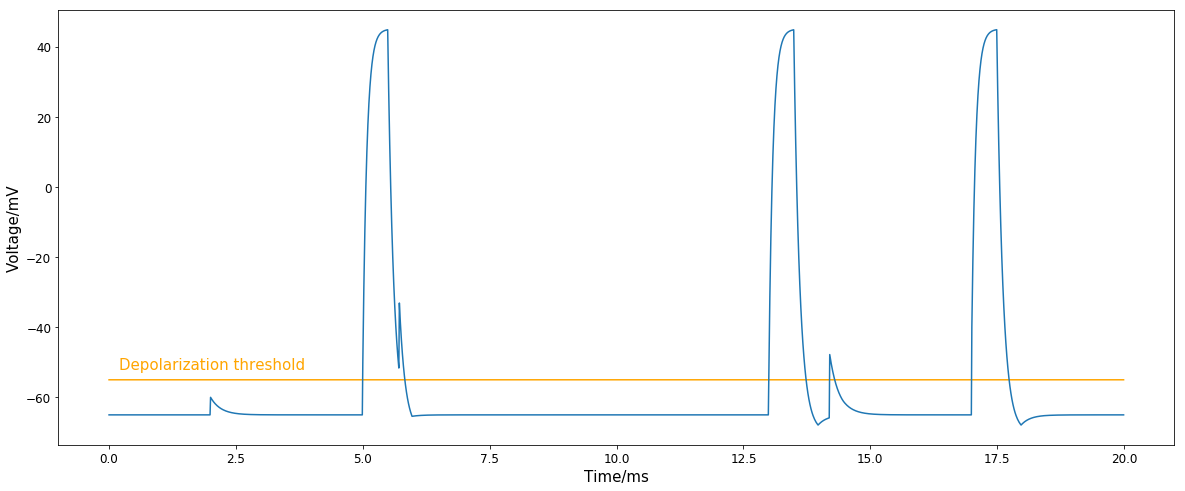

In [9]:
sn_results = sn.simulate()
# pd.set_option('display.max_rows', 1000)
# print(sn_results)

# Set up additional widgets for neural-network simulation:

In [10]:
network_simul_duration_w = widgets.FloatSlider(
    value = 10, # ms
    min = 5,
    max = 20,
    step = 0.5,
    description = 'ms:',
    disabled = False,
    continuous_update = False,
    orientation = 'horizontal',
    readout = True,
    readout_format = '.1f',
)

In [ ]:
print('Duration of the neural-network simulation:')
display(network_simul_duration_w)

# Define classes for neural-network simulation:

In [ ]:
class NeuralNetwork(Neuron, Time):
    def __init__(self, network):
        """
        network: Pass the corresponding neural-network string. Examples: 'ff_inhibition', 'fb_inhibition'
        """
        super().__init__()
        
        self.list_of_inputs = {'external': 0, # external stimulation
                               'synaptic': [] # from pre-synaptic neurons
                              }
        
        self.ff_inhibition = pd.DataFrame({'s1': [0, 0, 0, 0, 0],
                                           's2': [0, 0, 0, 0, 0], 
                                           'i1': [1, 0, 0, 0, 0], 
                                           'm1': [1, 0, 0, 0, 0],
                                           'm2': [0, 1, -1, 0, 0]},
                                          index = [['s1', 's2','i1', 'm1','m2']])
        
        self.fb_inhibition = pd.DataFrame({'s1': [0,0,0],
                                           'i1': [1,0,0], 
                                           'm1': [0,-1,0]},
                                          index = [['s1', 'i1', 'm1']])
        
        self.network = network
        
        if self.network == 'ff_inhibition': 
            self.s1 = Neuron(state = 'rest',
                             rest_potential = rest_potential_w.value,
                             depol_threshold = depol_threshold_w.value,
                             depol_potential = depol_potential_w.value,
                             hyperpol_threshold = hyperpol_threshold_w.value)

            self.s2 = Neuron(state = 'rest',
                             rest_potential = rest_potential_w.value,
                             depol_threshold = depol_threshold_w.value,
                             depol_potential = depol_potential_w.value,
                             hyperpol_threshold = hyperpol_threshold_w.value)

            self.i1 = Neuron(state = 'rest',
                             rest_potential = rest_potential_w.value,
                             depol_threshold = depol_threshold_w.value,
                             depol_potential = depol_potential_w.value,
                             hyperpol_threshold = hyperpol_threshold_w.value)

            self.m1 = Neuron(state = 'rest',
                             rest_potential = rest_potential_w.value,
                             depol_threshold = depol_threshold_w.value,
                             depol_potential = depol_potential_w.value,
                             hyperpol_threshold = hyperpol_threshold_w.value)

            self.m2 = Neuron(state = 'rest',
                             rest_potential = rest_potential_w.value,
                             depol_threshold = depol_threshold_w.value,
                             depol_potential = depol_potential_w.value,
                             hyperpol_threshold = hyperpol_threshold_w.value)
            
        else:
            self.s1 = Neuron(state = 'rest',
                             rest_potential = rest_potential_w.value,
                             depol_threshold = depol_threshold_w.value,
                             depol_potential = depol_potential_w.value,
                             hyperpol_threshold = hyperpol_threshold_w.value)

            self.i1 = Neuron(state = 'rest',
                             rest_potential = rest_potential_w.value,
                             depol_threshold = depol_threshold_w.value,
                             depol_potential = depol_potential_w.value,
                             hyperpol_threshold = hyperpol_threshold_w.value)

            self.m1 = Neuron(state = 'rest',
                             rest_potential = rest_potential_w.value,
                             depol_threshold = depol_threshold_w.value,
                             depol_potential = depol_potential_w.value,
                             hyperpol_threshold = hyperpol_threshold_w.value)
        
        self.store_voltage = {'ff_inhibition': {'s1': {'model': self.s1, 'voltage': []},
                                                's2': {'model': self.s2, 'voltage': []},
                                                'i1': {'model': self.i1, 'voltage': []},
                                                'm1': {'model': self.m1, 'voltage': []},
                                                'm2': {'model': self.m2, 'voltage': []},
                                               },
                              'fb_inhibition': {'s1': [], 'i1': [], 'm1': []}
                             }
        
        self.store_time = []

    def simulate(self, times_of_excitation=[5], amplitudes_of_excitation=[5], duration_of_simulation=10):
        
        self.duration_of_simulation = duration_of_simulation
        self.times_of_excitation = times_of_excitation
        self.amplitudes_of_excitation = amplitudes_of_excitation
        
        excitation_counter = 0 # it always works for s1
        
        while self.t_current < self.duration_of_simulation:
            #self.store_voltage.append(self.voltage)
            
            #voltage_dict = self.store_voltage[self.network]
            
            [self.store_voltage[self.network][key]['voltage'].append(self.store_voltage[self.network][key]['model'].voltage) for key in self.store_voltage[self.network].keys()]
            
            self.store_time.append(self.t_current)
            
            if excitation_counter < len(self.times_of_excitation) and np.round(self.t_current, 2) >= self.times_of_excitation[excitation_counter]:
                s1_excitation = self.amplitudes_of_excitation[excitation_counter]
                excitation_counter += 1
            else: 
                s1_excitation = 0
            self.s1.voltage_update(s1_excitation + self.ff_inhibition['s1']['s1'].values[0]*self.s1.output +
                                  self.ff_inhibition['s1']['s2'].values[0]*self.s2.output +
                                  self.ff_inhibition['s1']['i1'].values[0]*self.i1.output +
                                  self.ff_inhibition['s1']['m1'].values[0]*self.m1.output +
                                  self.ff_inhibition['s1']['m2'].values[0]*self.m1.output)
            self.s2.voltage_update(self.ff_inhibition['s2']['s1'].values[0]*self.s1.output +
                                  self.ff_inhibition['s2']['s2'].values[0]*self.s2.output +
                                  self.ff_inhibition['s2']['i1'].values[0]*self.i1.output +
                                  self.ff_inhibition['s2']['m1'].values[0]*self.m1.output +
                                  self.ff_inhibition['s2']['m2'].values[0]*self.m1.output)
            self.i1.voltage_update(0)
            self.m1.voltage_update(0)
            self.m2.voltage_update(0)
            
            self.s1.update_state()
            self.s2.update_state()
            self.i1.update_state()
            self.m1.update_state()
            self.m2.update_state()
            
            self.update_time()
            
            if self.s1.output > 0:
                print(self.s1.output)

            #print(self.ff_inhibition['s2']['s1'].values[0]*self.s1.output)
            """
            if excitation_counter < len(self.times_of_excitation) and np.round(self.t_current, 2) >= self.times_of_excitation[excitation_counter]:
                excitation = self.amplitudes_of_excitation[excitation_counter]
                excitation_counter += 1
            else: 
                excitation = 0
            super().voltage_update(excitation) # updates inputs of Neuron class
            super().update_state()
            super().update_time()
            """    
        return self.store_voltage
            

In [ ]:
nn = NeuralNetwork('ff_inhibition')

In [ ]:
v = nn.simulate()

In [ ]:
thresh = np.ones(1001)*(-55) 

plt.figure(figsize=(20,8))
plt.plot(time_list, voltage_list)
plt.plot(time_list, thresh)
plt.xlabel('time', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

* times_of_excitation
* amplitudes_of_excitation
* number_of_neurons=1
* duration_of_simulation=10

In [ ]:
s = Simulation(number_of_neurons=1, duration_of_simulation=duration_of_simulation.value, times_of_excitation=[1, 5], amplitudes_of_excitation=[5, 20])

In [ ]:
s.simulate()